### Disable build isolation:

- allows you to install a package without building it in an isolated environment
- package's build dependencies are installed in the project environment prior to building the package itself

```uv venv```

```uv pip install cython setuptools```

```uv pip install cchardet --no-build-isolation```



- ```uv``` simplifies this process by allowing you to specify packages that should not be built in isolation via the ```no-build-isolation-package``` setting in your ```pyproject.toml``` and the ```--no-build-isolation-package``` flag in the command line. 

- Further, when a package is marked for disabling build isolation, uv will perform a two-phase install, first installing any packages that support build isolation, followed by those that do not. 
- As a result, if a project's build dependencies are included as project dependencies, uv will automatically install them before installing the package that requires build isolation to be disabled


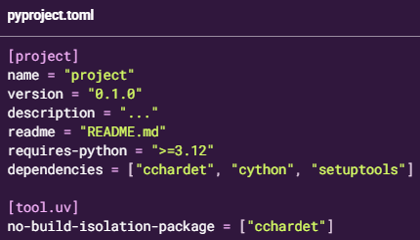

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/disable.png')
new_image = img.resize((420, 240))
display(new_image)

running ```uv sync```, uv will first install ```cython``` and ```setuptools``` in the project environment, followed by ```cchardet``` (without build isolation)

```uv sync --extra build```

similarly for ```flash-attn```:

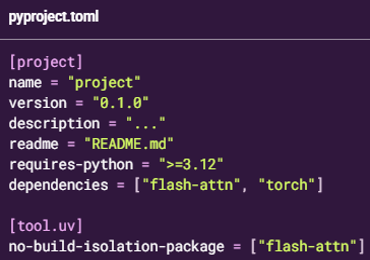

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/disable2.png')
new_image = img.resize((370, 260))
display(new_image)

- running ```uv sync```, ```uv``` will first install ```torch``` in the project environment, followed by ```flash-attn``` (without build isolation). 
- as ```torch``` is both a project dependency and a build dependency, the version of ```torch`` is guaranteed to be consistent between the build and runtime environments
- downside of the above approach is that it requires the build dependencies to be installed in the project environment, which is appropriate for flash-attn (which requires torch both at build-time and runtime), but not for cchardet (which only requires cython at build-time)

- to avoid including build dependencies in the project environment, uv supports a two-step installation process that allows you to separate the build dependencies from the packages that require them

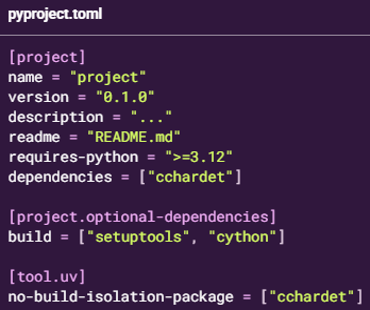

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/disable3.png')
new_image = img.resize((370, 310))
display(new_image)

- a user would first sync with the build optional group, and then without it to remove the build dependencies

```uv sync --extra build```

```uv sync```

Note:
- some packages, like ```cchardet```, only require build dependencies for the installation phase of ```uv sync```. Others require their build dependencies to be present even just to resolve the project's dependencies during the resolution phase
- in such cases, the build dependencies can be installed prior to running any ```uv lock``` or ```uv sync``` commands, using the lower lower-level ```uv pip```

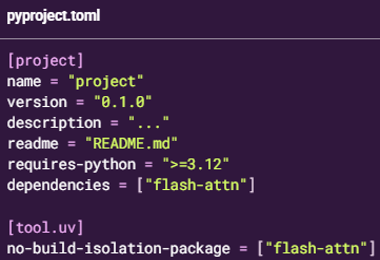

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/disable4.png')
new_image = img.resize((380, 260))
display(new_image)

- run the following sequence of commands to sync flash-attn

```uv venv```

```uv pip install torch setuptools```

```uv sync```

- alternatively, users can instead provide the ```flash-attn``` metadata upfront via the ```dependency-metadata``` setting, thereby forgoing the need to build the package during the dependency resolution phase

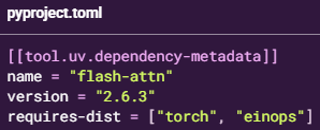

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/disable5.png')
new_image = img.resize((320, 130))
display(new_image)